In [28]:
#Import libraries, set up plotting, suppress warnings for data analysis.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
#Load CSV data, check its rows and columns count.
df = pd.read_csv("IRIS.csv")
df.shape


(150, 5)

In [30]:
#Presents the first few rows of a DataFrame (tabular data).
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
#Provides summary information about DataFrame: columns, data types, memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
#Count duplicate rows in a DataFrame.
df.duplicated().sum()

3

In [33]:
#Remove duplicate rows from the DataFrame in-place.
df.drop_duplicates(inplace = True)

In [34]:
#Check the count of duplicate rows after removal.
df.duplicated().sum()

0

In [35]:
#Count occurrences of unique values in the "species" column.
df["species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

In [36]:
#Compute the correlation matrix for the DataFrame's numerical columns.
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


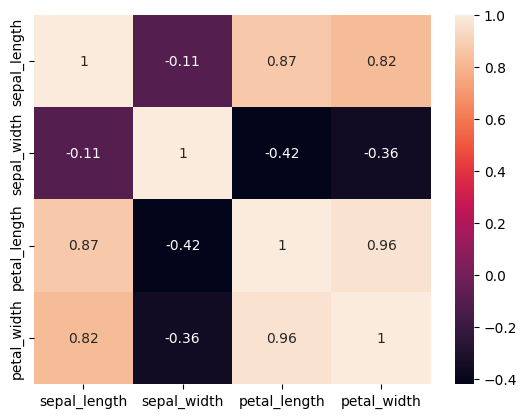

In [37]:
#Display heatmap of feature correlations with annotations.
sns.heatmap(df.corr(), annot=True)
plt.show()

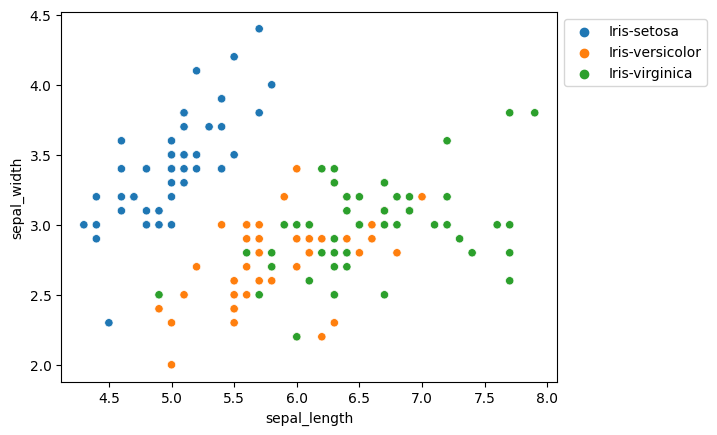

In [38]:
#Create scatter plot of sepal length vs. width with species coloring.
sns.scatterplot(data=df, x='sepal_length', y='sepal_width',
                hue='species' )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

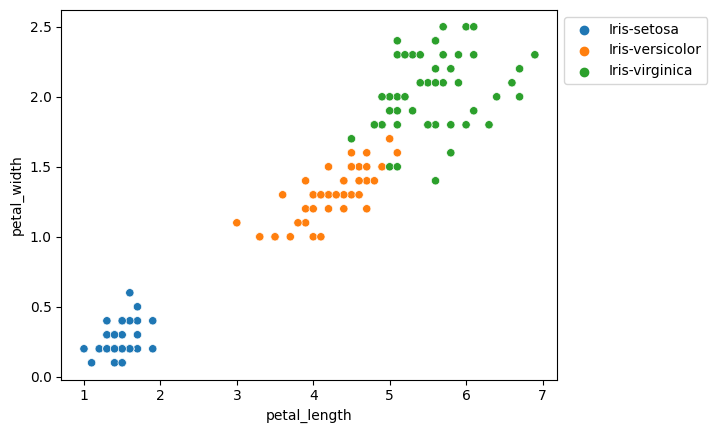

In [39]:
#Generate scatter plot of petal length vs. width with species distinction.
sns.scatterplot(data=df, x='petal_length', y='petal_width',
                hue='species' )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [40]:
#Split, train, predict with Logistic Regression, evaluate accuracy and classification report.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9333333333333333
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

